In [27]:

import os
for dirname, _, filenames in os.walk('MangoFruitDDS/SenMangoFruitDDS_original'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_001.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_002.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_003.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_004.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_005.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_006.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_007.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_008.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_009.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_010.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_011.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_012.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_013.jpg
MangoFruitDDS/SenMangoFruitDDS_original\Alternaria\alternaria_014.jpg
MangoFruitDDS/SenMan

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [29]:
# Directory with our training horse pictures
a_dir = os.path.join('MangoFruitDDS/SenMangoFruitDDS_original/Alternaria')

# Directory with our training human pictures
b_dir = os.path.join('MangoFruitDDS/SenMangoFruitDDS_original/Anthracnose')

# Directory with our training horse pictures
c_dir = os.path.join('MangoFruitDDS/SenMangoFruitDDS_original/Black Mould Rot')

# Directory with our training human pictures
d_dir = os.path.join('MangoFruitDDS/SenMangoFruitDDS_original/Healthy')

# Directory with our training horse pictures
e_dir = os.path.join('MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot')

In [30]:
a_names = os.listdir(a_dir)
print(a_names[:10])
b_names = os.listdir(b_dir)
print(b_names[:10])
c_names = os.listdir(c_dir)
print(c_names[:10])
d_names = os.listdir(d_dir)
print(d_names[:10])
e_names = os.listdir(e_dir)
print(e_names[:10])

['alternaria_001.jpg', 'alternaria_002.jpg', 'alternaria_003.jpg', 'alternaria_004.jpg', 'alternaria_005.jpg', 'alternaria_006.jpg', 'alternaria_007.jpg', 'alternaria_008.jpg', 'alternaria_009.jpg', 'alternaria_010.jpg']
['anthracnose_001.jpg', 'anthracnose_002.jpg', 'anthracnose_003.jpg', 'anthracnose_004.jpg', 'anthracnose_005.jpg', 'anthracnose_006.jpg', 'anthracnose_007.jpg', 'anthracnose_008.jpg', 'anthracnose_009.jpg', 'anthracnose_010.jpg']
['aspergillus_001.jpg', 'aspergillus_002.jpg', 'aspergillus_003.jpg', 'aspergillus_004.jpg', 'aspergillus_005.jpg', 'aspergillus_006.jpg', 'aspergillus_007.jpg', 'aspergillus_008.jpg', 'aspergillus_009.jpg', 'aspergillus_010.jpg']
['healthy_001.jpg', 'healthy_002.jpg', 'healthy_003.jpg', 'healthy_004.jpg', 'healthy_005.jpg', 'healthy_006.jpg', 'healthy_007.jpg', 'healthy_008.jpg', 'healthy_009.jpg', 'healthy_010.jpg']
['lasio_001.jpg', 'lasio_002.jpg', 'lasio_003.jpg', 'lasio_004.jpg', 'lasio_005.jpg', 'lasio_006.jpg', 'lasio_007.jpg', 'lasio

In [31]:
print('total Alternaria images:', len(os.listdir(a_dir)))
print('total Anthracnose images:', len(os.listdir(b_dir)))
print('total Black Mould Rot images:', len(os.listdir(c_dir)))
print('total Healthy images:', len(os.listdir(a_dir)))
print('total Stem end Rot images:', len(os.listdir(a_dir)))

total Alternaria images: 170
total Anthracnose images: 132
total Black Mould Rot images: 186
total Healthy images: 170
total Stem end Rot images: 170


In [32]:

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 8

# Index for iterating over images
pic_index = 0

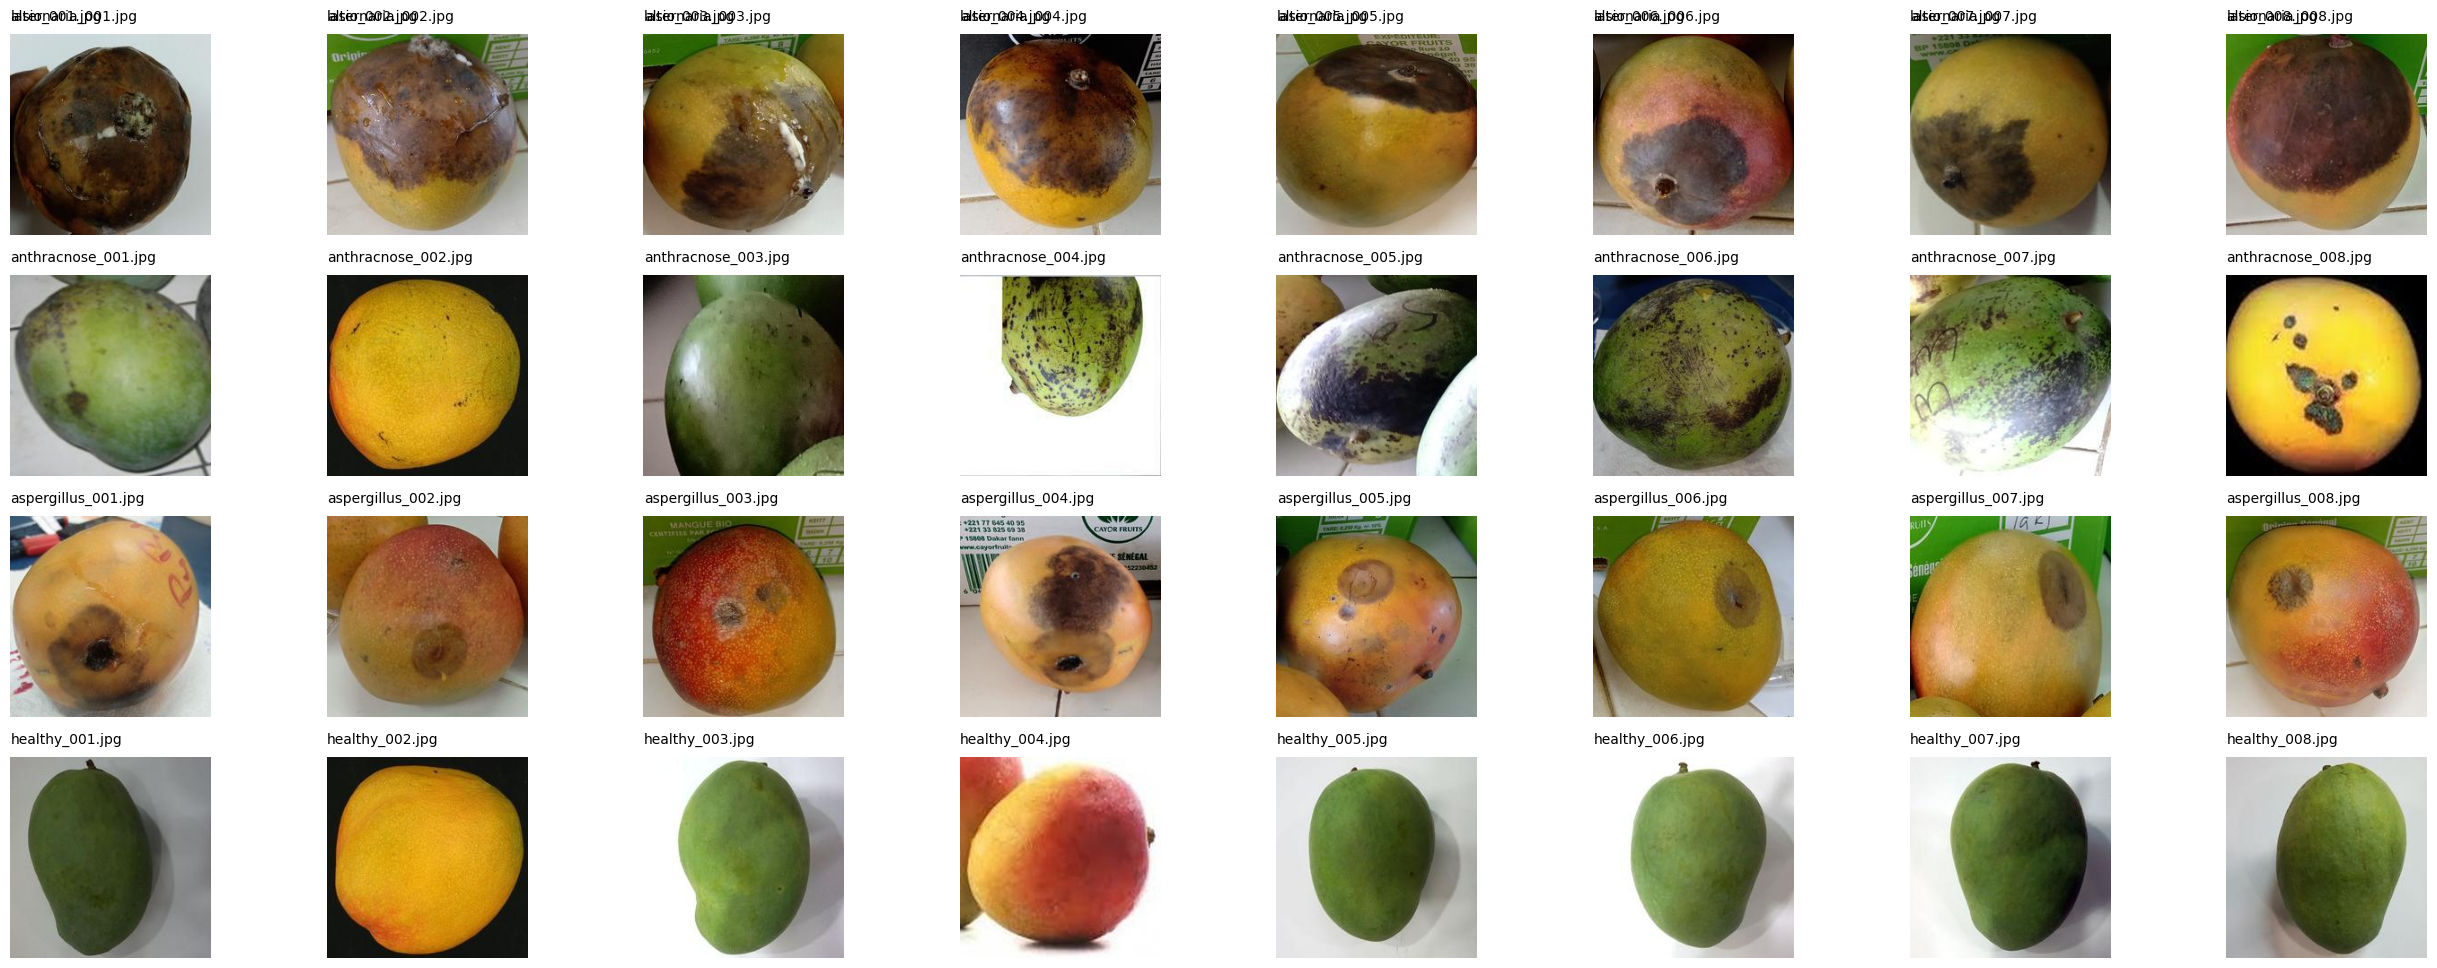

In [33]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3 )

pic_index += 8
    
a_pix = [os.path.join(a_dir, fname)
                for fname in a_names[pic_index-8:pic_index]]
b_pix = [os.path.join(b_dir, fname)
                for fname in b_names[pic_index-8:pic_index]]
c_pix = [os.path.join(c_dir, fname)
                for fname in c_names[pic_index-8:pic_index]]
d_pix = [os.path.join(d_dir, fname)
                for fname in d_names[pic_index-8:pic_index]]
e_pix = [os.path.join(e_dir, fname)
                for fname in e_names[pic_index-8:pic_index]]

for i, img_path in enumerate(a_pix + b_pix + c_pix + d_pix + e_pix):
  sp = plt.subplot(nrows, ncols, (i % (nrows * ncols)) + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
# Agrega una etiqueta con el nombre de la imagen
  plt.text(0, -20, img_path.split('\\')[-1], fontsize=10, va='center')
  


In [34]:
#lets load our dependecies
import tensorflow as tf
from tensorflow.keras import layers,utils,Sequential

In [35]:
from sklearn.model_selection import train_test_split

data_dir = 'MangoFruitDDS/SenMangoFruitDDS_original'
batch_size = 64
epochs = 30
input_shape = (300, 300, 3)
image_paths = []
labels = []

for category in os.listdir('MangoFruitDDS/SenMangoFruitDDS_original'):
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        for image_filename in os.listdir(category_dir):
            if image_filename.endswith('.jpg'):
                image_path = os.path.join(category_dir, image_filename)
                image_paths.append(image_path)
                labels.append(category)
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

In [36]:
len(train_image_paths),len(test_image_paths), len(train_labels), len(test_labels)

(689, 173, 689, 173)

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [39]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [40]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': train_image_paths, 'label': train_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': test_image_paths, 'label': test_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

Found 689 validated image filenames belonging to 5 classes.
Found 173 validated image filenames belonging to 5 classes.


In [44]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=8, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/100
8/8 [==============================] - 4s 502ms/step - loss: 0.4993 - accuracy: 0.8028 - val_loss: 0.5353 - val_accuracy: 0.7688
Epoch 2/100
8/8 [==============================] - 4s 473ms/step - loss: 0.5363 - accuracy: 0.7949 - val_loss: 0.6253 - val_accuracy: 0.7688
Epoch 3/100
8/8 [==============================] - 4s 453ms/step - loss: 0.5357 - accuracy: 0.8048 - val_loss: 0.6564 - val_accuracy: 0.7630
Epoch 4/100
8/8 [==============================] - 4s 457ms/step - loss: 0.5003 - accuracy: 0.7968 - val_loss: 0.5950 - val_accuracy: 0.7977
Epoch 5/100
8/8 [==============================] - 4s 468ms/step - loss: 0.5128 - accuracy: 0.8149 - val_loss: 0.5737 - val_accuracy: 0.8150
Epoch 6/100
8/8 [==============================] - 4s 469ms/step - loss: 0.4313 - accuracy: 0.8189 - val_loss: 0.5069 - val_accuracy: 0.8035
Epoch 7/100
8/8 [==============================] - 4s 471ms/step - loss: 0.5023 - accuracy: 0.7910 - val_loss: 0.5649 - val_accuracy: 0.7977
Epoch 8/100
8

In [45]:


# Evaluación del modelo con datos de prueba
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Loss en el conjunto de prueba: {test_loss}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

3/3 [==============================] - 0s 79ms/step - loss: 0.5320 - accuracy: 0.8266
Loss en el conjunto de prueba: 0.5319979786872864
Precisión en el conjunto de prueba: 0.8265895843505859


In [ ]:
from keras.utils import plot_model

plot_model(model, 'net.png', show_shapes=True)




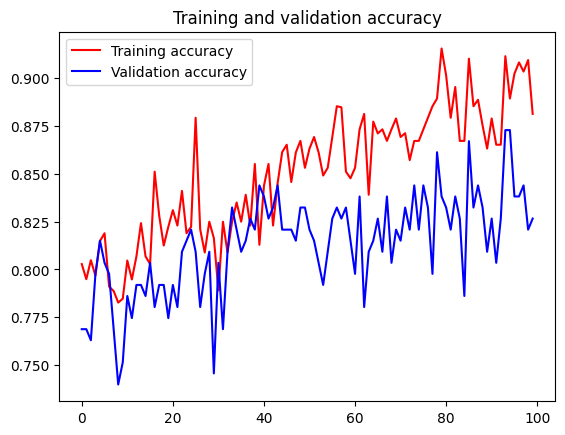

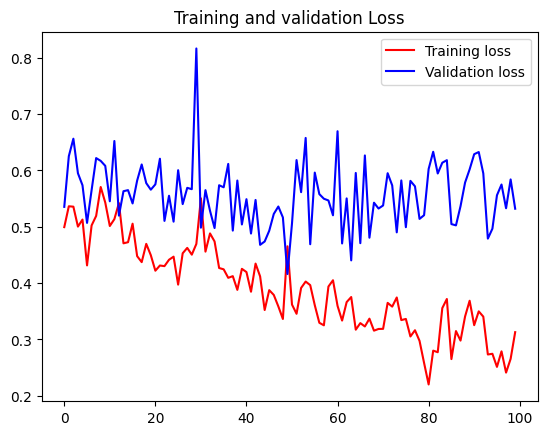

<Figure size 640x480 with 0 Axes>

In [46]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
# Save the model
model.save('mangos_model')